<a href="https://colab.research.google.com/github/SouvikChakraborty472/Web_Scraping/blob/main/Assignment_Module_2_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

#Web Scraping

In [ ]:
import csv
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
def get_record(card):
    atag = card.h2.a
    job_title = card.find("a").text.strip()
    job_url = 'https://www.timesjobs.com' + atag.get('href')
    company = card.find('h3', 'joblist-comp-name').text.strip().split('\r')[0]
    job_location = card.find('ul').text.strip().split('\n')[-1]
    salary = card.find('ul').text.strip().split('\n')[1]
    experience = card.find('li').text.strip().split('card_travel')[-1]

    record = (job_title,company,job_location,experience,salary,job_url)

    return record

In [ ]:
url = "https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=as&searchTextText=%22Data+Scientist%22&txtKeywords=%22Data+Scientist%22&txtLocation="
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
cards = soup.find_all('li', 'clearfix job-bx wht-shd-bx')
card = cards[0]

In [ ]:
records = []
for card in cards:
    record = get_record(card)
    records.append(record)

#Data Extraction

In [ ]:
with open('result.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle', 'Company', 'Location', 'Experience', 'Salary', 'URL'])
        writer.writerows(records)

#Data Organization

In [ ]:
data = pd.read_csv("/content/result.csv")
data.head()

,JobTitle,Company,Location,Experience,Salary,URL
0,Data Scientist,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3 - 8 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...
1,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
4,"Data Scientist ,",SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...


In [ ]:
data.columns

Index(['JobTitle', 'Company', 'Location', 'Experience', 'Salary', 'URL'], dtype='object')

In [ ]:
data.isnull().sum()

JobTitle       0
Company        0
Location       0
Experience     0
Salary        20
URL            0
dtype: int64

In [ ]:
data.fillna('Not Mentioned')

,JobTitle,Company,Location,Experience,Salary,URL
0,Data Scientist,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3 - 8 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
1,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
4,"Data Scientist ,",SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
5,Data Scientist,2COMS Consulting Pvt Ltd\n (More Jobs),Bengaluru / Bangalore,4 - 6 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
6,Data Scientist / Data Analyst Fresher,Alpha Tech\n (More Jobs),"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",0 - 1 yrs,₹Rs 4.50 - 7.50 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
7,Data Scientist,RedLotus,Mumbai,0 - 3 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
8,Data scientist,HyreFox Consultants,Jaipur,0 - 3 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
9,Data Scientist,Datagrid Solutions,Mumbai,5 - 6 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...


In [ ]:
data['min_exp'] = data.Experience.str[:1]
data['max_exp'] = data.Experience.str[4:5]
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp
0,Data Scientist,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3 - 8 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,3,8
1,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
4,"Data Scientist ,",SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
5,Data Scientist,2COMS Consulting Pvt Ltd\n (More Jobs),Bengaluru / Bangalore,4 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,6
6,Data Scientist / Data Analyst Fresher,Alpha Tech\n (More Jobs),"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",0 - 1 yrs,₹Rs 4.50 - 7.50 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,0,1
7,Data Scientist,RedLotus,Mumbai,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3
8,Data scientist,HyreFox Consultants,Jaipur,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3
9,Data Scientist,Datagrid Solutions,Mumbai,5 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,5,6


In [ ]:
data.loc[data["Location"] == "location_on", "Location"] = "not_mentioned"
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp
0,Data Scientist,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3 - 8 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,3,8
1,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
4,"Data Scientist ,",SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
5,Data Scientist,2COMS Consulting Pvt Ltd\n (More Jobs),Bengaluru / Bangalore,4 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,6
6,Data Scientist / Data Analyst Fresher,Alpha Tech\n (More Jobs),"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",0 - 1 yrs,₹Rs 4.50 - 7.50 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,0,1
7,Data Scientist,RedLotus,Mumbai,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3
8,Data scientist,HyreFox Consultants,Jaipur,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3
9,Data Scientist,Datagrid Solutions,Mumbai,5 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,5,6


In [ ]:
data['initial_salary'] = data.Salary.str[:9]

In [ ]:
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp,initial_salary
0,Data Scientist,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3 - 8 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,3,8,NaN
1,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 43.10
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1,₹Rs 43.10
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 55.10
4,"Data Scientist ,",SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1,₹Rs 43.10
5,Data Scientist,2COMS Consulting Pvt Ltd\n (More Jobs),Bengaluru / Bangalore,4 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,6,NaN
6,Data Scientist / Data Analyst Fresher,Alpha Tech\n (More Jobs),"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",0 - 1 yrs,₹Rs 4.50 - 7.50 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,0,1,₹Rs 4.50
7,Data Scientist,RedLotus,Mumbai,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3,NaN
8,Data scientist,HyreFox Consultants,Jaipur,0 - 3 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,0,3,NaN
9,Data Scientist,Datagrid Solutions,Mumbai,5 - 6 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,5,6,NaN


In [ ]:
data = data.drop(columns = ['JobTitle', 'Experience', 'Salary', 'URL'])

In [ ]:
data

,Company,Location,min_exp,max_exp,initial_salary
0,Phoenix Global Resettlement Services Pvt Ltd\n...,Bengaluru / Bangalore,3,8,NaN
1,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2,7,₹Rs 43.10
2,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6,1,₹Rs 43.10
3,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2,7,₹Rs 55.10
4,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,6,1,₹Rs 43.10
5,2COMS Consulting Pvt Ltd\n (More Jobs),Bengaluru / Bangalore,4,6,NaN
6,Alpha Tech\n (More Jobs),"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",0,1,₹Rs 4.50
7,RedLotus,Mumbai,0,3,NaN
8,HyreFox Consultants,Jaipur,0,3,NaN
9,Datagrid Solutions,Mumbai,5,6,NaN


#Insights Generation

In [ ]:
company_count = data['Company'].nunique()
print(f'The number of unique companies is: {company_count}')

The number of unique companies is: 16


In [ ]:
unique_companies = data['Company'].unique()
for company in unique_companies:
    print(company)

Phoenix Global Resettlement Services Pvt Ltd
     (More Jobs)
SKYWALK VISA IMMIGRATION SERVICES LLP
     (More Jobs)
2COMS Consulting Pvt Ltd
     (More Jobs)
Alpha Tech
     (More Jobs)
RedLotus
HyreFox Consultants
Datagrid Solutions
Armaco Chemical Processes Systems Pvt Ltd
BizViz Technologies
Efftronics Systems Pvt Ltd
axmiyan hr solutions private limited
Exxonmobil Company India Pvt Ltd
alliance recruitment agency
string bio pvt. ltd
LogicPlum Private Limited
ispatial techno solutions pvt ltd.


In [ ]:
Max_company = data['Company'].value_counts().idxmax()
print(f'The company that appears the most: {Max_company}')

The company that appears the most: LogicPlum Private Limited


In [ ]:
mumbai_recruiters = data[data['Location'] == 'Mumbai']
print(mumbai_recruiters['Company'])

7              RedLotus
9    Datagrid Solutions
Name: Company, dtype: object


In [ ]:
job_fresher = data[data['min_exp'] == '0' ]
company_fresher = job_fresher['Company']
print(f'Companies recruiting freshers are: {company_fresher}')

Companies recruiting freshers are: 6    Alpha Tech\n     (More Jobs)
7                        RedLotus
8             HyreFox Consultants
Name: Company, dtype: object


#Visualization

Text(0.5, 1.0, 'Unique Company Counts')

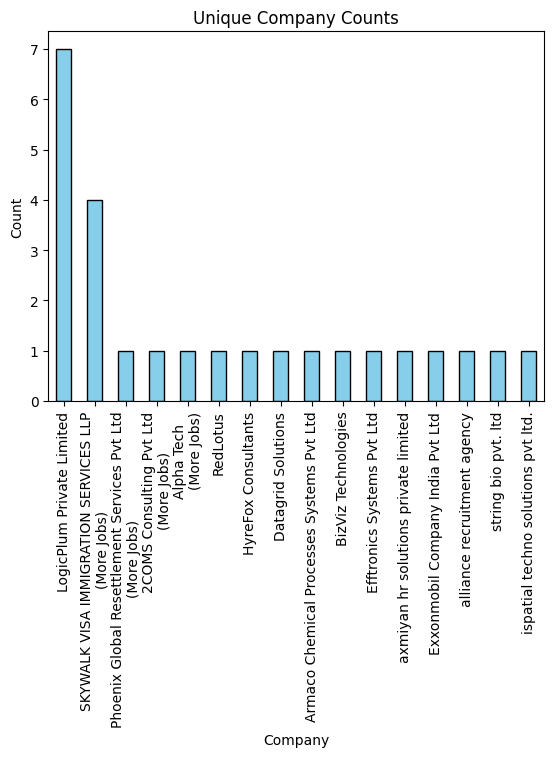

In [ ]:
company_counts = data['Company'].value_counts()
company_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Unique Company Counts')

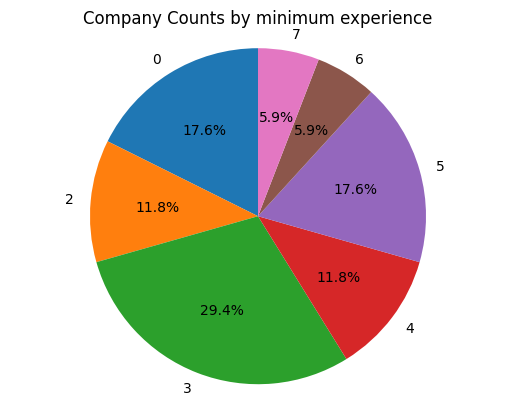

In [ ]:
minexp_counts = data.groupby('min_exp')['Company'].nunique()
plt.pie(minexp_counts, labels=minexp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Company Counts by minimum experience')
plt.axis('equal')
plt.show()